#### Using ML to handl imbalnced dataSet 

<strong>Note:</strong>
    This work aims to apply some prediction models on an imbalanced dataset  to see how accurate they are in detecting whether a transaction is ordinair or fraud it. 
    you can download Dataset from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">here</a>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
print("nbr of each class :\n",df.Class.value_counts())
## we notice that the target will be imbalanced

nbr of each class :
 0    284315
1       492
Name: Class, dtype: int64


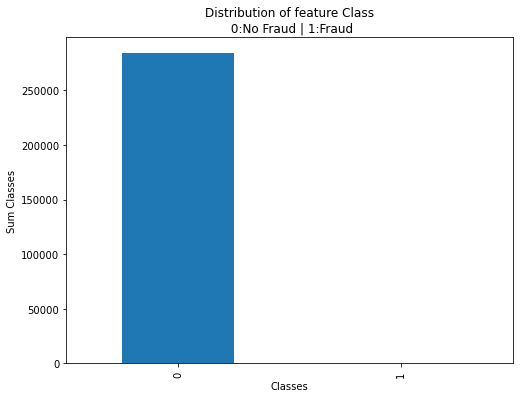

In [5]:
Classes = df.Class.value_counts()

Classes.plot(kind='bar',figsize=(8,6))
plt.xlabel("Classes")
plt.ylabel("Sum Classes")
plt.title("Distribution of feature Class\n 0:No Fraud | 1:Fraud")
plt.show()

In [6]:
## independent and dependent features
x=df.drop("Class", axis=1)
y=df.Class

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix


In [8]:
scal=StandardScaler()
x_scal=scal.fit_transform(x)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x_scal,y,random_state=10,test_size=0.2)

##### Accuracy score dosn't work well with the imbalanced dataset as a metric (you will get usually high and misleading information), instead use classification reporet (f1-score, precision/recall score) or confusion matrix which are highly recommended.

In [10]:
def models(estimator,X_train,X_test,y_train,y_test):
    model=estimator()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    return print(classification_report(y_test,y_pred),"\n", 
                 confusion_matrix(y_test,y_pred),"\n")

Classification report without hyperparamater tuning:

In [11]:
models(DecisionTreeClassifier,X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.82      0.77      0.79        94

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962
 
 [[56852    16]
 [   22    72]] 



We will involve two techniques of Over Sampler which called <strong>SMOTE and RandomOverSampler</strong> to adjust the class distribution of a dataset

##### Over Sampling

In [12]:
#pip install imbalanced-learn

In [13]:
import imblearn
print(imblearn.__version__)

0.8.1


In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
smote=SMOTE(0.50)

C:\Users\PC\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [16]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [17]:
X_train_smote.shape

(341170, 30)

In [18]:
from collections import Counter

In [19]:
print("before smote: ",Counter(y_train))
print("before smote: ",Counter(y_train_smote))

before smote:  Counter({0: 227447, 1: 398})
before smote:  Counter({0: 227447, 1: 113723})


In [20]:
models(DecisionTreeClassifier,X_train_smote,X_test,y_train_smote,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.34      0.79      0.47        94

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962
 
 [[56723   145]
 [   20    74]] 



In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros=RandomOverSampler(0.50)

C:\Users\PC\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [23]:
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)

In [24]:
print("before OverSampler: ",Counter(y_train))
print("before OverSampler: ",Counter(y_train_ros))

before OverSampler:  Counter({0: 227447, 1: 398})
before OverSampler:  Counter({0: 227447, 1: 113723})


In [25]:
models(DecisionTreeClassifier,X_train_ros,X_test,y_train_ros,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.77      0.73      0.75        94

    accuracy                           1.00     56962
   macro avg       0.88      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 
 [[56847    21]
 [   25    69]] 



#### Apply hyperparameter tuning DecisionTreeClassifier on Dataset

In [28]:
cv=KFold(3,shuffle=True,random_state=None)
param= {"criterion":["gini", "entropy"],
      
    "max_depth":np.arange(2,5),
      "min_samples_split":np.arange(2,5),
      "min_samples_leaf":np.arange(1,5)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=cv,n_jobs=1,verbose=1)


In [29]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])},
             verbose=1)

In [30]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [31]:
grid.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
grid_y_pred=grid.predict(X_test)
print(classification_report(y_test,grid_y_pred),"\n",confusion_matrix(y_test,grid_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.91      0.79      0.85        94

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962
 
 [[56861     7]
 [   20    74]]


<strong>Conclusion:</strong> As you noticed with the Hyperparameter tuning, the fraud detection results are accurate well but take more time to execute, manely when it comes about big dataset. 